<a href="https://colab.research.google.com/github/wafer110/Python-DataMining-MachineLearning/blob/master/HW1_Part2_WeiHuaHsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Packages

In [305]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pylab as plt

# Save plots
from google.colab import files 
#plt.tight_layout() # avoid cropping png
#plt.savefig('graph_name.png') # save to png
#files.download('graph_name.png') # download png

# Ignore warnings
import warnings; warnings.filterwarnings("ignore")

# Machine Learning
from keras.datasets import cifar10 
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split 
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers.advanced_activations import LeakyReLU
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score

# Naturan Language Processing
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk  # lemmatize & tokenize 
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')  # stopwords
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
from gensim.models import Word2Vec  # Word2Vec
from gensim.test.utils import common_texts, get_tmpfile

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Part II

The purpose of this part of the assignment is to compare the performance of MLP networks to CNN networks in the context of an image classification problem and a sentiment analysis problem (classify a sentence as carrying a positive sentiment (e.g., “I love chocolate”) or negative sentiment (e.g., “his performance was substandard on this task”).  
  
Reference:   
https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python  
https://www.datacamp.com/community/blog/keras-cheat-sheet

## A. Image Classification  

### Load Data: cifar10 

Train: X = (50000, 32, 32, 3), y = (50000, 1)
Test : X = (10000, 32, 32, 3), y = (10000, 1)


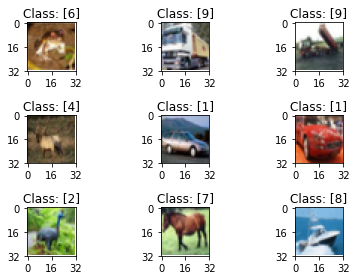

In [ ]:
# Load cifar10 from karas
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Shape of the dataset
print('Train: X = %s, y = %s' % (X_train.shape, y_train.shape))
print('Test : X = %s, y = %s' % (X_test.shape , y_test.shape))
# Note: 60000 images, 10 classes, 32x32 colour images, RGB

# Visualize the image data
fig = plt.figure()
for i in range(9):
  plt.subplot(3, 3, i+1)  # row, col
  plt.tight_layout()
  plt.imshow(X_train[i])
  plt.title("Class: {}".format(y_train[i]))
  plt.xticks([0, 16, 32])
  plt.yticks([0, 16, 32])

### b. Transform the images into  
 1) a vector representation appropriate for MLP;  

In [ ]:
# a vector for MLP

# Reshape the data to feed into the network
# Convert its type to float32  
X_train10M = X_train.reshape(len(X_train), 3072).astype('float32')
X_test10M  = X_test.reshape(len(X_test), 3072).astype('float32')

# Normalize the pixel values in range 0,-1 (Rescale)
X_train10M, X_test10M = X_train10M/255, X_test10M/255

#/check/ shape of transformed data
print('X_train10 shape: ', X_train10M.shape)
print('X_test10 shape:'  , X_test10M.shape)

X_train10 shape:  (50000, 3072)
X_test10 shape: (10000, 3072)


 2) a tensor representation for a 2D-CNN: To feed an image data into a CNN model, the dimension of the input tensor should be either (width x height x num_channel) or (num_channel x width x height).    
   
Reference: https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c

In [ ]:
# 2D-CNN

# Reshape the data to feed into the network
# Convert its type to float32  
X_train10C = X_train.reshape(len(X_train), 32, 32, 3).astype('float32')
X_test10C  = X_test.reshape(len(X_test), 32, 32, 3).astype('float32')

# Normalize the pixel values in range 0,-1 (Rescale)
X_train10C, X_test10C = X_train10C/255, X_test10C/255

#/check/ shape of transformed data
print('X_train10 shape: ', X_train10C.shape)
print('X_test10 shape:'  , X_test10C.shape)

X_train10 shape:  (50000, 32, 32, 3)
X_test10 shape: (10000, 32, 32, 3)


### c. Use one-hot-encoding to encode the output for the three classes  
  
Since I chose class 0, 1, and 5. The `n_classes` in hot-plate encoding requires a sequence number. Hence, I use `n_classes = 6` in order to get the array of 0, 1, and 5 columns. Afterthat, the `np.delete` is applied to delete those empty  2, 3, and 4 columns.

In [ ]:
#/check/ shape of original data
print("Shape BEFORE one-hot encoding:")
print("y_train = %s, y_test = %s" % (y_train.shape, y_test.shape))

# Change the labels from categorical to one-hot encoding
n_classes = 10
y_train10 = to_categorical(y_train, n_classes)
y_test10 = to_categorical(y_test, n_classes)

#/check/ shape of transformed data
print("Shape AFTER one-hot encoding:")
print("y_train10 = %s, y_test10 = %s" % (y_train10.shape, y_test10.shape))

# /testing/ label and position in one-hot
print('Original label:', y_train[613])
print('After conversion to one-hot:', y_train10[613]) 

Shape BEFORE one-hot encoding:
y_train = (50000, 1), y_test = (10000, 1)
Shape AFTER one-hot encoding:
y_train10 = (50000, 10), y_test10 = (10000, 10)
Original label: [9]
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### a. Choose three classes of images to work on.    
According to the data discription on OpenML, I would like to work on these 3 classes: 0 airplane, 1 automobile, and 5 dog. In order to extract those 3 classes, the `class_idx` is created to store the indices at which class is 0, 1, and 5. Then the subsets of `X_train` and `y_train` can be stored through indices.  
  
> `class_idx`: The indices at which class is 0, 1, and 5.  
> `X_train3`, `y_train3`: Subset of training data with only 0, 1, and 5 class.



In [ ]:
# MLP #

#/check/ shape of X_train10M, y_train10
print('Shape of original testing subsets : X = %s, y = %s' % (X_train10M.shape ,
                                                              y_train10.shape))

# Retrieve indices from 3 classes - Train Data
trainclass_idx = []
for i in range(len(y_train)):
  classes = [0, 1, 5]
  for j in classes:
    if y_train[:,0][i] == j:
      trainclass_idx.append(i)
#/check/ index length is 15000 = 5000 observations * 3 classes
print('Index Length: %s' % len(trainclass_idx))
#/check/ number of unique class
print('Using 3 Classes: %s' % set(y_train[:,0][trainclass_idx]))

# Get the subset of X_train, y_train thru `class_idx`
X_train3M = X_train10M[:,][trainclass_idx]
y_train3 = y_train10[:,][trainclass_idx]
#/check/ shape of X_train3, y_train3
print('Shape of training subsets : X = %s, y = %s' % (X_train3M.shape , 
                                                      y_train3.shape))

##########################################################################

#/check/ shape of X_test10M, y_test10
print('Shape of original testing subsets : X = %s, y = %s' % (X_test10M.shape ,
                                                              y_test10.shape))

# Retrieve indices from 3 classes - Test Data
testclass_idx = []
for i in range(len(y_test)):
  classes = [0, 1, 5]
  for j in classes:
    if y_test[:,0][i] == j:
      testclass_idx.append(i)
#/check/ index length is 15000 = 5000 observations * 3 classes
print('Index Length: %s' % len(testclass_idx))
#/check/ number of unique class: class 0, 1, 5
print('Using 3 Classes: %s' % set(y_test[:,0][testclass_idx]))

# Get the subset of X_train, y_train thru `class_idx`
X_test3M = X_test10M[:,][testclass_idx]
y_test3 = y_test10[:,][testclass_idx]
#/check/ shape of X_train3, y_train3
print('Shape of testing subsets : X = %s, y = %s' % (X_test3M.shape , 
                                                     y_test3.shape))

Shape of original testing subsets : X = (50000, 3072), y = (50000, 10)
Index Length: 15000
Using 3 Classes: {0, 1, 5}
Shape of training subsets : X = (15000, 3072), y = (15000, 10)
Shape of original testing subsets : X = (10000, 3072), y = (10000, 10)
Index Length: 3000
Using 3 Classes: {0, 1, 5}
Shape of testing subsets : X = (3000, 3072), y = (3000, 10)


In [ ]:
# CNN #

#/check/ shape of X_train10C, y_train10
print('Shape of original testing subsets : X = %s, y = %s' % (X_train10C.shape ,
                                                              y_train10.shape))

# Retrieve indices from 3 classes - Train Data
trainclass_idx = []
for i in range(len(y_train)):
  classes = [0, 1, 5]
  for j in classes:
    if y_train[:,0][i] == j:
      trainclass_idx.append(i)
#/check/ index length is 15000 = 5000 observations * 3 classes
print('Index Length: %s' % len(trainclass_idx))
#/check/ number of unique class
print('Using 3 Classes: %s' % set(y_train[:,0][trainclass_idx]))

# Get the subset of X_train, y_train thru `class_idx`
X_train3C = X_train10C[:,][trainclass_idx]
y_train3 = y_train10[:,][trainclass_idx]
#/check/ shape of X_train3, y_train3
print('Shape of training subsets : X = %s, y = %s' % (X_train3C.shape , 
                                                      y_train3.shape))

##########################################################################

#/check/ shape of X_test10C, y_test10
print('Shape of original testing subsets : X = %s, y = %s' % (X_test10C.shape ,
                                                              y_test10.shape))

# Retrieve indices from 3 classes - Test Data
testclass_idx = []
for i in range(len(y_test)):
  classes = [0, 1, 5]
  for j in classes:
    if y_test[:,0][i] == j:
      testclass_idx.append(i)
#/check/ index length is 15000 = 5000 observations * 3 classes
print('Index Length: %s' % len(testclass_idx))
#/check/ number of unique class: class 0, 1, 5
print('Using 3 Classes: %s' % set(y_test[:,0][testclass_idx]))

# Get the subset of X_train, y_train thru `class_idx`
X_test3C = X_test10C[:,][testclass_idx]
y_test3 = y_test10[:,][testclass_idx]
#/check/ shape of X_train3, y_train3
print('Shape of testing subsets : X = %s, y = %s' % (X_test3C.shape , 
                                                     y_test3.shape))

Shape of original testing subsets : X = (50000, 32, 32, 3), y = (50000, 10)
Index Length: 15000
Using 3 Classes: {0, 1, 5}
Shape of training subsets : X = (15000, 32, 32, 3), y = (15000, 10)
Shape of original testing subsets : X = (10000, 32, 32, 3), y = (10000, 10)
Index Length: 3000
Using 3 Classes: {0, 1, 5}
Shape of testing subsets : X = (3000, 32, 32, 3), y = (3000, 10)


#### a. (continued) Remove redundant columns.
For labeling data, I remove other 7 columns but the columns of those 0, 1, and 5 class.

In [ ]:
#/check/ other than the column 0, 1, 5 are zeros
print('/Train/')
print(' other than 0, 1, 5 classes: ', 
      sum(y_train3[:,[2, 3, 4, 6, 7, 8, 9]]))
print(' class 0, 1, 5:', sum(y_train3[:,[0, 1, 5]]))
print('/Test/')
print(' other than 0, 1, 5 classes: ', 
      sum(y_test3[:,[2, 3, 4, 6, 7, 8, 9]]))
print(' class 0, 1, 5:', sum(y_test3[:,[0, 1, 5]]))

# Remove empty columns: 2 3 4 6 7 8 9
y_train3 = np.delete(y_train3, np.s_[[2,3,4,6,7,8,9]], axis=1)
y_test3 = np.delete(y_test3, np.s_[[2,3,4,6,7,8,9]], axis=1)


#/check/ shape of y_train3, y_test3
print('Shape of labels : y_train3 = %s, y_test3 = %s' % (y_train3.shape , 
                                                         y_test3.shape))

/Train/
 other than 0, 1, 5 classes:  [0. 0. 0. 0. 0. 0. 0.]
 class 0, 1, 5: [5000. 5000. 5000.]
/Test/
 other than 0, 1, 5 classes:  [0. 0. 0. 0. 0. 0. 0.]
 class 0, 1, 5: [1000. 1000. 1000.]
Shape of labels : y_train3 = (15000, 3), y_test3 = (3000, 3)


### d. Divide the data into a training and a test set (80% for training; 20% for testing. Make sure that the data is chosen at random)

In [ ]:
# MLP #

# Combine the train/test from X/y
X_M = np.concatenate((X_train3M, X_test3M), axis=0)
y = np.concatenate((y_train3, y_test3), axis=0)
print('Shape of X = %s, y = %s' % (X_M.shape, y.shape))

# Randomly split the data into 80%-20% 
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_M, y,
                                                    train_size = 0.8,
                                                    random_state = 613)

Shape of X = (18000, 3072), y = (18000, 3)


In [ ]:
# CNN #

# Combine the train/test from X/y
X_C = np.concatenate((X_train3C, X_test3C), axis=0)
y = np.concatenate((y_train3, y_test3), axis=0)
print('Shape of X = %s, y = %s' % (X_C.shape, y.shape))

# Randomly split the data into 80%-20% 
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_C, y,
                                                    train_size = 0.8,
                                                    random_state = 613)

Shape of X = (18000, 32, 32, 3), y = (18000, 3)


### e. Divide the training data into a training set and a validation set. Optimize MLP’s parameters.

In [ ]:
# MLP #

# Get training set & validation set from the training data
X_train_M, X_valid_M, y_train_M, y_valid_M = train_test_split(X_train_M, 
                                                              y_train_M,
                                                              train_size = 0.8,
                                                              random_state = 316)

# /check/ shape of final fitting data
print(X_train_M.shape, y_train_M.shape)
print(X_valid_M.shape, y_valid_M.shape)

(11520, 3072) (11520, 3)
(2880, 3072) (2880, 3)


In [ ]:
# CNN #

# Get training set & validation set from the training data
X_train_C, X_valid_C, y_train_C, y_valid_C = train_test_split(X_train_C, 
                                                              y_train_C,
                                                              train_size = 0.8,
                                                              random_state = 316)

# /check/ shape of final fitting data
print(X_train_C.shape, y_train_C.shape)
print(X_valid_C.shape, y_valid_C.shape)

(11520, 32, 32, 3) (11520, 3)
(2880, 32, 32, 3) (2880, 3)


#### e. (continued) Optimize MLP’s parameters.

In [ ]:
# Fit the MLP Model

# Build a linear stack of layers with the sequential model
model = Sequential()
# Input hidden layer (X_train1.shape[1]) 
model.add(Dense(512, input_shape=(3072,), activation = 'relu'))
model.add(Dropout(0.2)) # dropout layer can overcome overfitting to some extend
# first hidden layer
model.add(Dense(512, activation = 'relu'))      
model.add(Dropout(0.2))
# second hidden layer
model.add(Dense(512, activation = 'relu'))      
model.add(Dropout(0.2))
# Output layer (3 = number of class)
model.add(Dense(3, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1

### f. Return your results on the training and testing set. Beware of overfitting and experiment with early stopping to see if that helps decrease the amount of overfitting.

In [ ]:
# MLP results

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_MLP = model.fit(X_train_M, y_train_M,
          batch_size=64, epochs=30, verbose=2,  # 128/50 not good
          validation_data=(X_valid_M, y_valid_M))

Epoch 1/50
90/90 - 4s - loss: 1.4020 - accuracy: 0.4942 - val_loss: 0.8102 - val_accuracy: 0.6726
Epoch 2/50
90/90 - 4s - loss: 0.8481 - accuracy: 0.6208 - val_loss: 0.8032 - val_accuracy: 0.6747
Epoch 3/50
90/90 - 4s - loss: 0.7762 - accuracy: 0.6707 - val_loss: 0.6784 - val_accuracy: 0.7351
Epoch 4/50
90/90 - 4s - loss: 0.7367 - accuracy: 0.6898 - val_loss: 0.7142 - val_accuracy: 0.7135
Epoch 5/50
90/90 - 4s - loss: 0.7057 - accuracy: 0.7082 - val_loss: 0.7735 - val_accuracy: 0.6649
Epoch 6/50
90/90 - 4s - loss: 0.6888 - accuracy: 0.7179 - val_loss: 0.6617 - val_accuracy: 0.7587
Epoch 7/50
90/90 - 4s - loss: 0.6622 - accuracy: 0.7286 - val_loss: 0.6211 - val_accuracy: 0.7618
Epoch 8/50
90/90 - 4s - loss: 0.6472 - accuracy: 0.7327 - val_loss: 0.6014 - val_accuracy: 0.7656
Epoch 9/50
90/90 - 4s - loss: 0.6437 - accuracy: 0.7368 - val_loss: 0.6779 - val_accuracy: 0.7319
Epoch 10/50
90/90 - 4s - loss: 0.6200 - accuracy: 0.7479 - val_loss: 0.6924 - val_accuracy: 0.7215
Epoch 11/50
90/90 -

### g. Optimize CNN’s parameters  
  
*Note*: ReLU is more effective than the widely used logistic sigmoid function. However, during the training, ReLU units can "die". This can happen when a large gradient flows through a ReLU neuron: it can cause the weights to update in such a way that the neuron will never activate on any data point again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. Leaky ReLUs attempt to solve this: the function will not be zero but will instead have a small negative slope.

In [ ]:
# Fit the CNN Model

# Build a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer 
# (set Conv2D = 32 >> faster, = 128 slower but higher accuracy)
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 input_shape=(32,32,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))  # increase the accuracy
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.4))
# flatten output of Conv
model.add(Flatten())
# hidden layer
model.add(Dense(512, activation='relu'))
#model.add(LeakyReLU(alpha=0.1))      
model.add(Dropout(0.3))
# output layer            
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               8389120   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)              

### h. Return your results on the training and testing set. Same comments about overfitting.

In [ ]:
# CNN results

# compile the sequential model
model.compile(optimizer='adam',  # rmsprop
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# train the model for 50 epochs
history_CNN = model.fit(X_train_C, y_train_C,
          batch_size=64, epochs=30, verbose=2, 
          validation_data=(X_valid_C, y_valid_C))

Epoch 1/50
90/90 - 32s - loss: 0.9188 - accuracy: 0.6753 - val_loss: 0.4792 - val_accuracy: 0.8156
Epoch 2/50
90/90 - 32s - loss: 0.4353 - accuracy: 0.8319 - val_loss: 0.3696 - val_accuracy: 0.8594
Epoch 3/50
90/90 - 32s - loss: 0.3472 - accuracy: 0.8682 - val_loss: 0.3136 - val_accuracy: 0.8795
Epoch 4/50
90/90 - 32s - loss: 0.3207 - accuracy: 0.8775 - val_loss: 0.2964 - val_accuracy: 0.8920
Epoch 5/50
90/90 - 32s - loss: 0.2769 - accuracy: 0.8955 - val_loss: 0.2680 - val_accuracy: 0.8979
Epoch 6/50
90/90 - 31s - loss: 0.2626 - accuracy: 0.9028 - val_loss: 0.2526 - val_accuracy: 0.9045
Epoch 7/50
90/90 - 34s - loss: 0.2457 - accuracy: 0.9066 - val_loss: 0.2577 - val_accuracy: 0.9003
Epoch 8/50
90/90 - 32s - loss: 0.2177 - accuracy: 0.9197 - val_loss: 0.2330 - val_accuracy: 0.9104
Epoch 9/50
90/90 - 32s - loss: 0.2082 - accuracy: 0.9234 - val_loss: 0.2361 - val_accuracy: 0.9135
Epoch 10/50
90/90 - 32s - loss: 0.1940 - accuracy: 0.9286 - val_loss: 0.2242 - val_accuracy: 0.9187
Epoch 11/

### i. Your report should include:   
   
1.   A table showing the results obtained by MLP and CNN on the training and testing set; You can use accuracy.
2.   A discussion of your observations (which should discuss the observations made as you experimented and observations about the results).

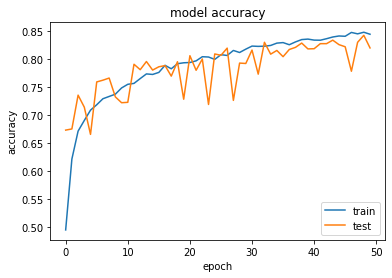

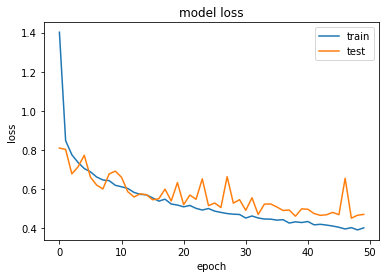

In [ ]:
# MLP

plt.plot(history_MLP.history['accuracy'])
plt.plot(history_MLP.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


plt.plot(history_MLP.history['loss'])
plt.plot(history_MLP.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**My Comments:**
In MLP, the testing data accuracy are very fluctuating between epoch 20 and 30. Other than that, the overall trend in testing data is good, its accuracy is high and close to the training data.  
  
- 

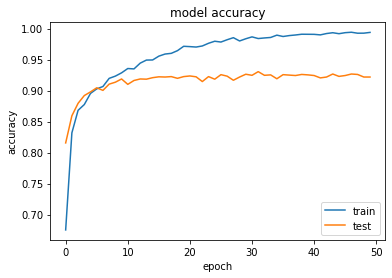

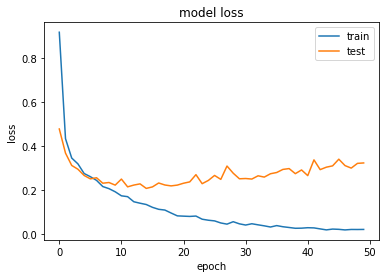

In [ ]:
# CNN

plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**My Comments:**
As for CNN method, the size between training and testing accuracy is larger, but the testing accuracy is still pretty high. In fact, the accuracy in testing are basically greater than 90% since epoch 10. Another good news is that we do not have over-fitting problem here. But I think I might be able to obtain a greater accuracy by changing the parameters in CNN.  
  
- 

## B. Text Classification

### Load Data: IMDB & Data Pre-processing

The size of data is 748 observations with 2 columns. The class column is a binary variable, and the distribution of the classes are balanced.  
  
- 

In [308]:
# Read data through Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the data
text_path2 = '/content/drive/My Drive/Colab Notebooks/ML_DataMining/HW1/data/sentiment labelled sentences/imdb_labelled.txt'
imdb = pd.read_csv(text_path2, sep = "\t", header = None)

# View the shape
print(imdb.shape)

# Rename the columns
imdb = imdb.rename(columns = {0: "texts", 1: "labels"})

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(748, 2)


**My Comments**:  
We do have a balanced binary model.  
  
- 

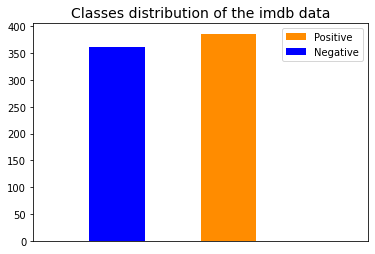

In [309]:
# Check class balance by plotting
plt.hist(imdb[imdb.labels == 1].labels,
         bins=2, color='darkorange', label='Positive')
plt.hist(imdb[imdb.labels == 0].labels,
         bins=2, color='blue', label='Negative')
plt.title('Classes distribution of the imdb data', fontsize = 14)
plt.xticks([])
plt.xlim(-0.5, 2.5)
plt.legend()
plt.show()

In [310]:
# Data Pre-Cleaning  
def PreCleaning(text):
  out = text
  # set to uppercase
  out = str(out).upper()
  # drop Punctuations
  punc = "\\【.*?】+|\\-《.*?》+|\\#.*?#+|[.!/_,$&%^;*()<>+""'?@|:~{}#]+|[-——！\\\；，。=？、：「」『』→￥……（）《》【】]"  
  out = re.sub(punc, ' ', out) 
  # remove single digits
  out = re.sub(r'\s\d+', ' ', out)
  # delete redundant spaces
  out = ' '.join(out.split())
  # set back to lowercase
  out = out.lower()
  return(out) 

imdb['texts_clean'] = imdb['texts'].apply(PreCleaning)

### a. Create a tf-idf vector representation for the text data (Representation 1)  

In [311]:
corpus = list(imdb.texts_clean)
tfidf = TfidfVectorizer(analyzer='word', 
                        stop_words='english', 
                        ngram_range=(2,3))
X = tfidf.fit_transform(corpus).toarray()
tfidf_imdb = pd.DataFrame(X)
tfidf_imdb.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10802,10803,10804,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814,10815,10816,10817,10818,10819,10820,10821,10822,10823,10824,10825,10826,10827,10828,10829,10830,10831,10832,10833,10834,10835,10836,10837,10838,10839,10840,10841
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.278571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### b. Use a pre-trained Word2Vec embedding to encode your data (Representation 2)

- Tokenize

In [ ]:
# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
#	table = str.maketrans('', '', string.punctuation)
#	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

# combine imdb reiews
text = ' '.join(list(imdb.texts_clean))
imdb_vocab = clean_doc(text)
# print the vocabulary
print('Vocabulary size: %d' % len(imdb_vocab))
print('First 10 words: %s' % imdb_vocab[0:10])

7329

- Lemmatize & tokenize in the data

In [ ]:
# lemmatize & tokenize
def textNormalization(corpus):
    output = corpus
    output = [lemmatizer.lemmatize(w) for w in word_tokenize(output)] 
    return(output)

# fit the function
imdb['texts_new'] = imdb['texts_clean'].apply(textNormalization)
# get a corpus1 of tokens
corpus1 = list(imdb.texts_new) 
# print the data to view the new column with tokens
imdb.head()

,texts,labels,texts_clean,texts_new
0,"A very, very, very slow-moving, aimless movie ...",0,a very very very slow moving aimless movie abo...,"[a, very, very, very, slow, moving, aimless, m..."
1,Not sure who was more lost - the flat characte...,0,not sure who was more lost the flat characters...,"[not, sure, who, wa, more, lost, the, flat, ch..."
2,Attempting artiness with black & white and cle...,0,attempting artiness with black white and cleve...,"[attempting, artiness, with, black, white, and..."
3,Very little music or anything to speak of.,0,very little music or anything to speak of,"[very, little, music, or, anything, to, speak,..."
4,The best scene in the movie was when Gerardo i...,1,the best scene in the movie was when gerardo i...,"[the, best, scene, in, the, movie, wa, when, g..."


- Word2Vec: build vocabulary

In [ ]:
# Use corpus1 (tokens)

# obtain Word2Vec
path = get_tmpfile("word2vec.model")
# build vocabulary and train model
model = Word2Vec(corpus1, size=150, window=10, min_count=1, workers=4)
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")
model.wv.most_similar('computer',topn = 5)

# summarize vocabulary size in model
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))
print('First 10 words: %s' % words[0:10])

# save model in ASCII (word2vec) format
filename = 'embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary = False)

[('user', 0.08864536881446838),
 ('interface', 0.03496822342276573),
 ('minors', 0.027140775695443153),
 ('human', -0.008530494756996632),
 ('trees', -0.012887472286820412)]

In [ ]:
# Pre-train embedding

# load embedding as a dict
def load_embedding(filename):
	# load embedding into memory, skip first line
	file = open(filename,'r')
	lines = file.readlines()[1:]
	file.close()
	# create a map of words to vectors
	embedding = dict()
	for line in lines:
    parts = line.split
		# key is string word, value is numpy array for vector
		embedding[parts[0]] = asarray(parts[1:], dtype='float32')
  return(embedding)

### c. Divide the data, at random, into training and testing sets (Use a 80%-20% divide and use the same division for the two representations)

In [312]:
# Get training set & testing set - TFIDF
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(tfidf_imdb, 
                                                                imdb.labels,
                                                                train_size = 0.8,
                                                                random_state = 316)

### d. Run MLP on the training set encoded using tf-idf (optimize the network on the training data (divide the training data into a training and a validation set) as well as you can)

In [313]:
# Get training set & validation set from the training data
X_train_tf, X_valid_tf, y_train_tf, y_valid_tf = train_test_split(X_train_tf, 
                                                                  y_train_tf,
                                                                  train_size = 0.8,
                                                                  random_state = 42)

In [314]:
# Fit the MLP Model (Binary Class)

# Build a linear stack of layers with the sequential model
model = Sequential()
# Input hidden layer (X_train1.shape[1]) 
model.add(Dense(32, input_shape=(10842,), activation = 'relu', 
                kernel_initializer='uniform'))
# first hidden layer
model.add(Dense(8, activation = 'relu', kernel_initializer='uniform'))      
# Output layer
model.add(Dense(1, activation = 'sigmoid', kernel_initializer='uniform'))

In [ ]:
# MLP results

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_MLP = model.fit(X_train_tf, y_train_tf,
          batch_size=128, epochs=50, verbose=1,  # 64/128,50 
          validation_data=(X_valid_tf, y_valid_tf))

### e. Train a 1-D CNN on the Word2Vec embedding (optimize the network on the training data (divide the training data into a training and a validation set) as well as you can)

In [ ]:
# Fit the 1-D CNN Model
model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X_train_W2V, y_train_W2V, epochs=10, verbose=2)
# evaluate
loss, acc = model.evaluate(X_test_W2V, y_test_W2V, verbose=0)
print('Test Accuracy: %f' % (acc*100))


### f. Return all the results in a table showing the Precision, Recall and F1-measures. One row should show the tf-idf/MLP combination and one row should show the Word2Vec/1D-CNN combination.
### g. Discuss your observations (which should discuss the observations made as you experimented and observations about the results)


In [325]:
# Evaluate MLP results

_, train_acc = model.evaluate(X_train_tf, y_train_tf, verbose=0)
_, test_acc = model.evaluate(X_test_tf, y_test_tf, verbose=0)

print("Train Accuracy %s" % train_acc)
print("Test Accuracy %s" % test_acc)

Train Accuracy 0.9874476790428162
Test Accuracy 0.6399999856948853


In [360]:
# predict y through X_test
y_pred_tf = model.predict(X_test_tf)
# set y_pred_tf as a binary
y_pred_tf[y_pred_tf > 0.5] = 1
y_pred_tf[y_pred_tf <= 0.5] = 0

# Confusion matrix
confusion_matrix(y_test_tf, y_pred_tf)
# Precision = 67.21%
tf_Prec = precision_score(y_test_tf, y_pred_tf)
# Recall = 54.6%
tf_Recall = recall_score(y_test_tf, y_pred_tf)
# F1 score = 60.3%
tf_F1 = f1_score(y_test_tf, y_pred_tf)

evaltable = {'Methods'    : ["tf-idf/MLP", "Word2Vec/1D-CNN"], 
             'Precision'  : [tf_Prec, ""],
             'Recall'     : [tf_Recall, ""],
             "F1-measures": [tf_F1, ""]}

pd.DataFrame(data = evaltable)  
  

,Methods,Precision,Recall,F1-measures
0,tf-idf/MLP,0.672131,0.546667,0.602941
1,Word2Vec/1D-CNN,,,


-
  

**My Comments:**  
Though the evaluation scores in tf-idf/MLP is not very good, the 67% in precision is actually better than I expected. I may need to adjust the parameters. At least this result is the best try I could do. Besides, I also do a good data pre-procession beforehand, including remove punctuations and redundant numbers/single word. I would guess it might be the dictionary matter. The next step would be explore a possible methods in changing the dictionary in the MLP methods, and figure the Word2Vec/CNN out.  
  
- 

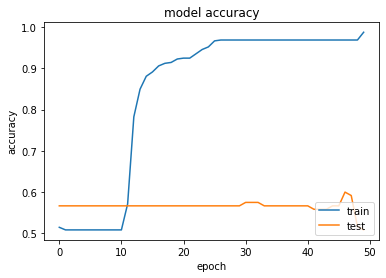

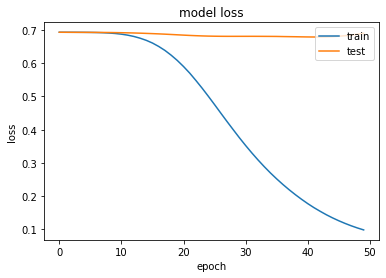

In [358]:
# Visualize the TF-IDF MLP

plt.plot(history_MLP.history['accuracy'])
plt.plot(history_MLP.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


plt.plot(history_MLP.history['loss'])
plt.plot(history_MLP.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()